## Get the data

In [1]:
import pandas as pd

In [2]:
base1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df1 = pd.DataFrame(base1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns

In [4]:
df1.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


## EDA (Exploratory Data Analysis)

## Show DataFrame info

In [5]:
df1.columns = df1.columns.str.lower().str.replace(' ','_')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [7]:
df1.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Describe DataFrame

In [8]:
df1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Show a plot of the total number of responses

<AxesSubplot:>

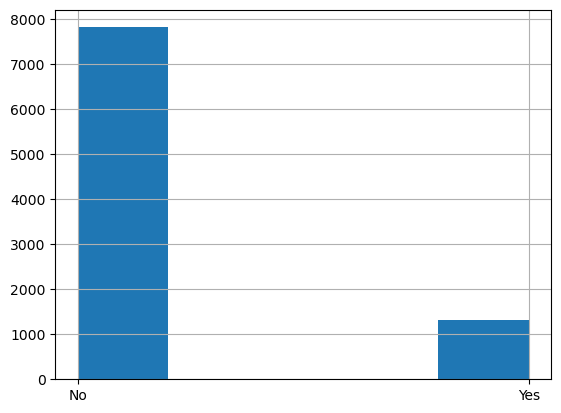

In [9]:
df1.response.hist(bins = 5)

## Show a plot of the response rate by the sales channel

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

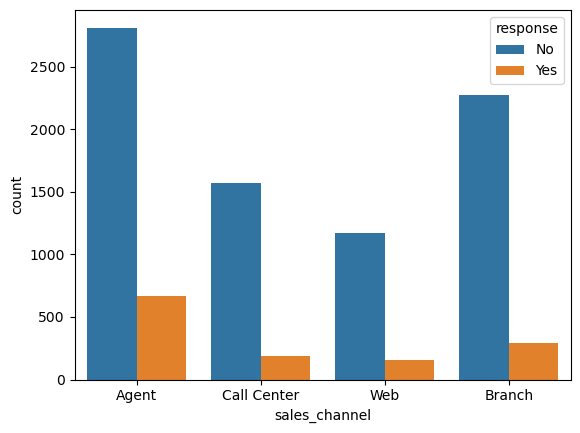

In [10]:
sns.countplot(data=df1, x='sales_channel', hue='response', dodge=True)

## Show a plot of the response rate by the total claim amount.

/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_5893/110933298.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df1, x = 'response', y = 'total_claim_amount', ci = None)


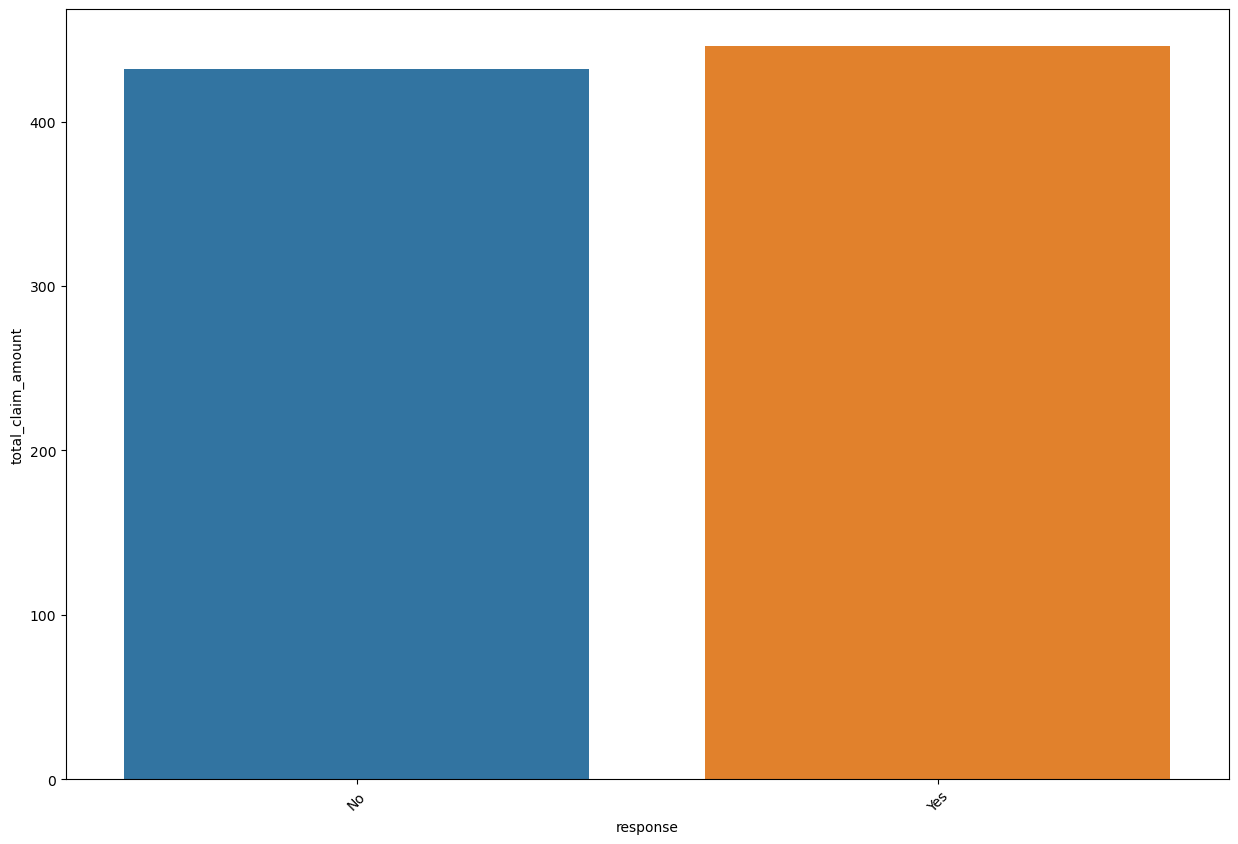

In [11]:
plt.figure(figsize = (15, 10))
sns.barplot(data = df1, x = 'response', y = 'total_claim_amount', ci = None)
plt.xticks(rotation = 45)
plt.show()

## Show a plot of the response rate by income

/var/folders/v4/bqj9vzp11vd1cvhf93rmpqt00000gp/T/ipykernel_5893/2241075398.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df1, x = 'response', y = 'income', ci = None)


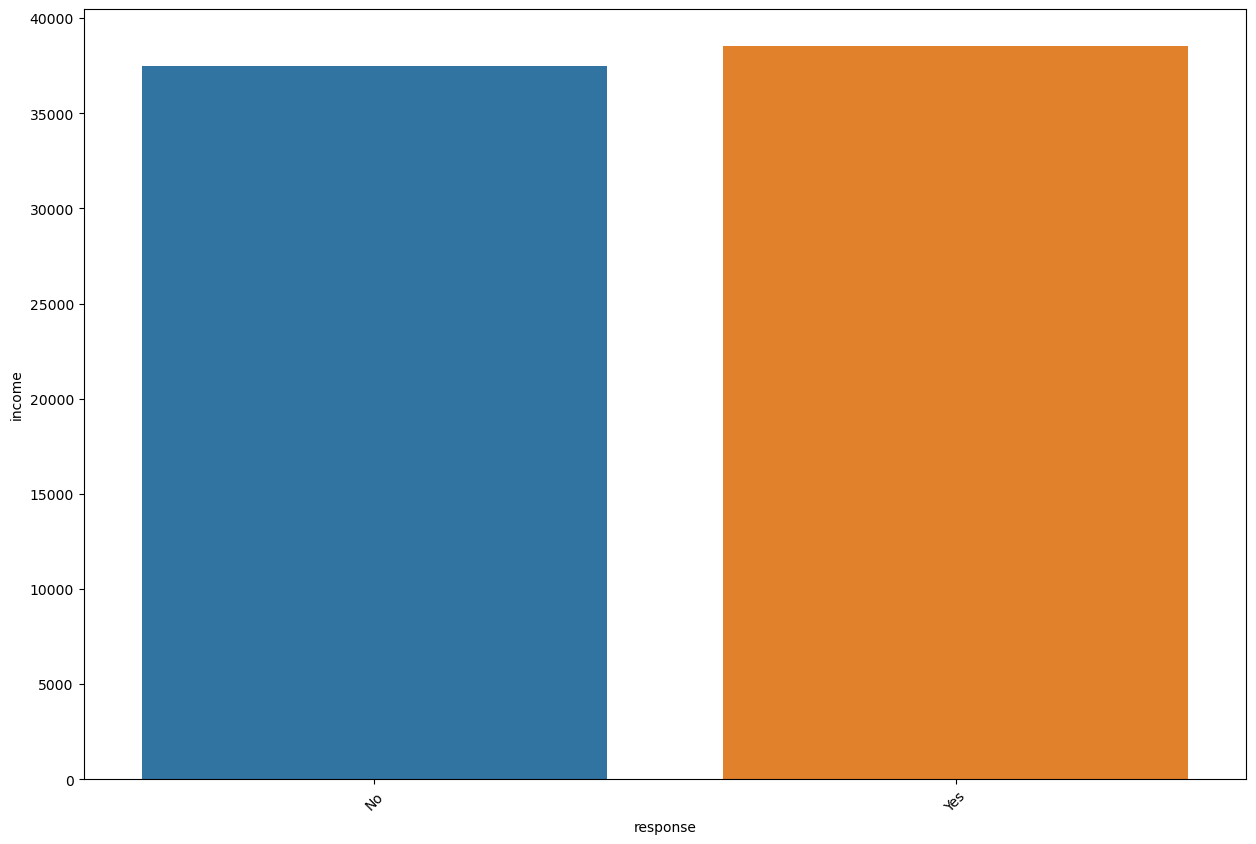

In [12]:
plt.figure(figsize = (15, 10))
sns.barplot(data = df1, x = 'response', y = 'income', ci = None)
plt.xticks(rotation = 45)
plt.show()

### X-Y SPLIT

In [14]:
df_num = df1.select_dtypes(exclude='object')
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [15]:
y=df_num['total_claim_amount']
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [16]:
X = df_num.drop(['total_claim_amount'], axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [17]:
for column in df_num.columns:
    df_num[column] = df_num[column]  / df_num[column].abs().max()

In [18]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.033165,0.562847,0.231544,0.914286,0.050505,0.0,0.111111,0.133004
1,0.083762,0.000000,0.315436,0.371429,0.424242,0.0,0.888889,0.391072
2,0.154664,0.487763,0.362416,0.514286,0.383838,0.0,0.222222,0.195792
3,0.091759,0.000000,0.355705,0.514286,0.656566,0.0,0.777778,0.183145
4,0.033768,0.438443,0.244966,0.342857,0.444444,0.0,0.111111,0.047743
...,...,...,...,...,...,...,...,...
9129,0.280899,0.719547,0.244966,0.514286,0.898990,0.0,0.222222,0.068517
9130,0.037162,0.216081,0.265101,0.400000,0.282828,0.0,0.111111,0.131064
9131,0.097976,0.000000,0.285235,0.257143,0.373737,0.6,0.222222,0.273322
9132,0.090302,0.219452,0.322148,0.971429,0.030303,0.0,0.333333,0.238902
